## assignment 08 regression
# linear-target variable:continous only, feature: cat/cont
# phase 1-Setup & EDA

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



In [156]:
df=pd.read_csv('house_price_prediction_dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [157]:
df.shape

(1460, 81)

In [158]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [159]:
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [160]:
df.isnull().sum()[df.isnull().sum() > 0] #taking only those columns which have null values



LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [161]:
null_cols = df.isnull().sum()[df.isnull().sum() > 0].index
df[null_cols].dtypes


LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [162]:
for col in null_cols:
    if df[col].dtype in ['int64', 'float64']:   # numeric columns
        df[col].fillna(df[col].median(), inplace=True)
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
#Use mean when the distribution is roughly normal.
#Use median when the feature has outliers or skewed distribution.
df.isnull().sum()[df.isnull().sum() > 0]

C:\Users\rajas\AppData\Local\Temp\ipykernel_22380\3689543661.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\rajas\AppData\Local\Temp\ipykernel_22380\3689543661.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Series([], dtype: int64)

In [163]:
cat=df.select_dtypes(include='object').columns
cont=df.select_dtypes(include=['int64','float64']).columns
cont=cont.drop('SalePrice') #target variable is not a feature so removing it from continous features
cont
cat

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

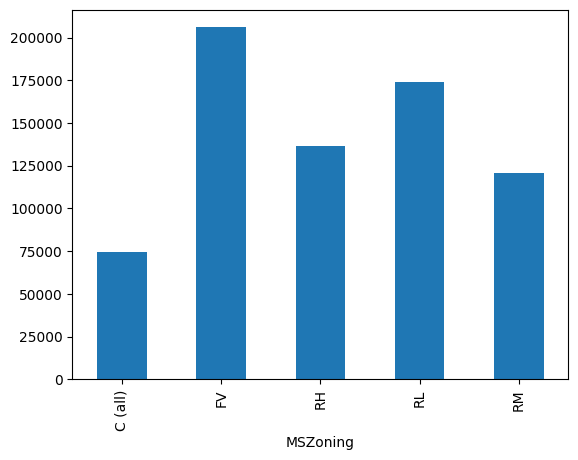

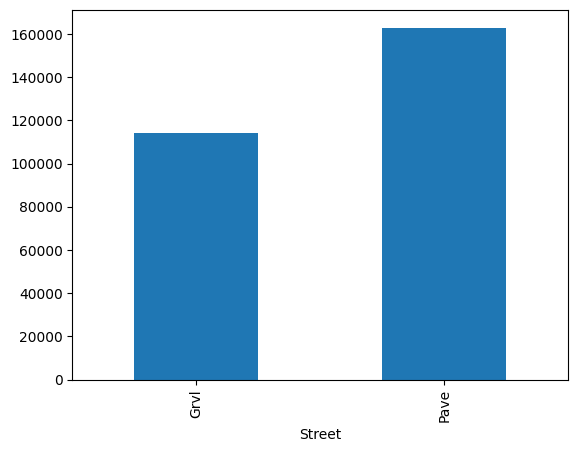

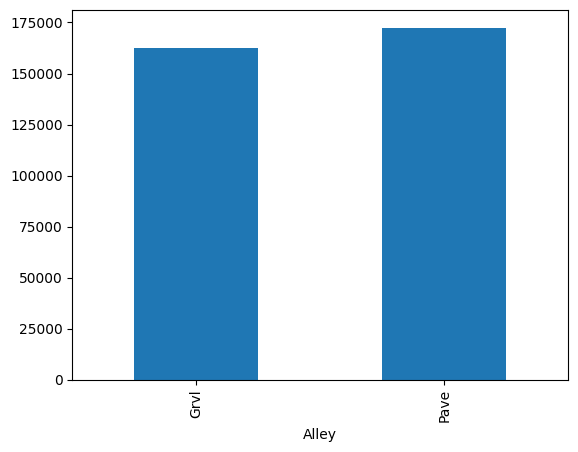

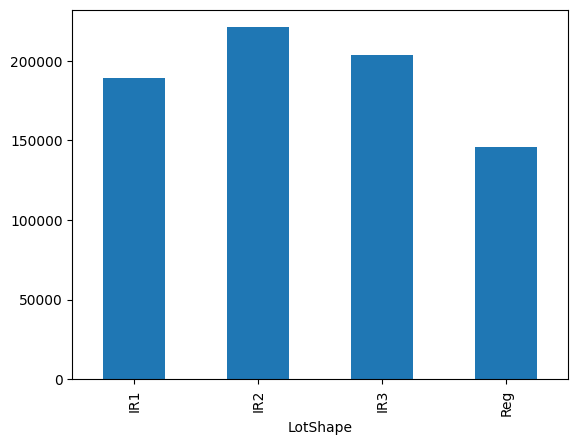

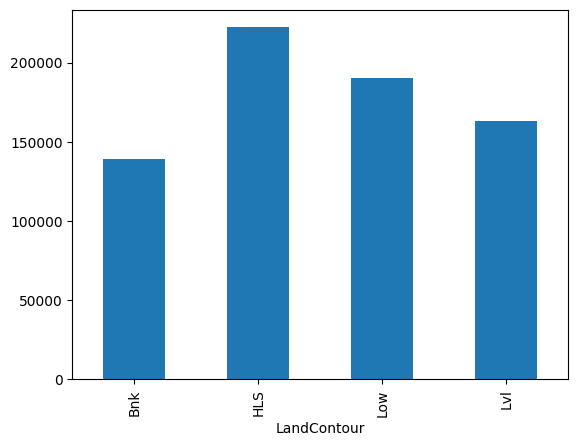

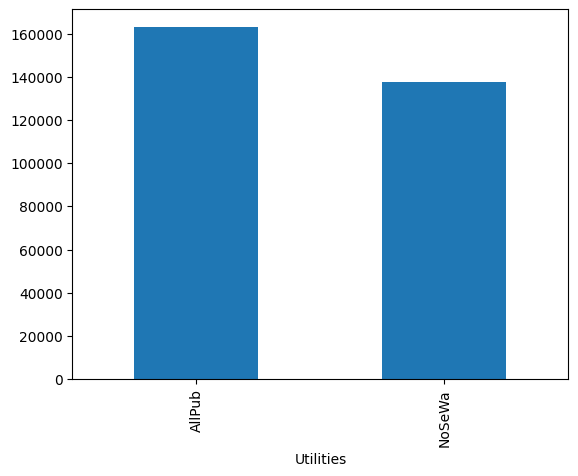

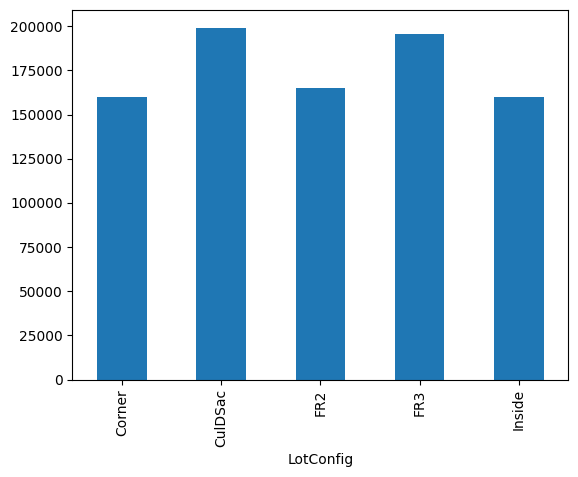

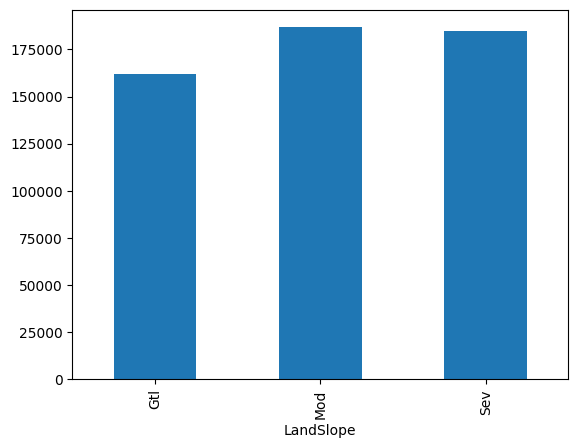

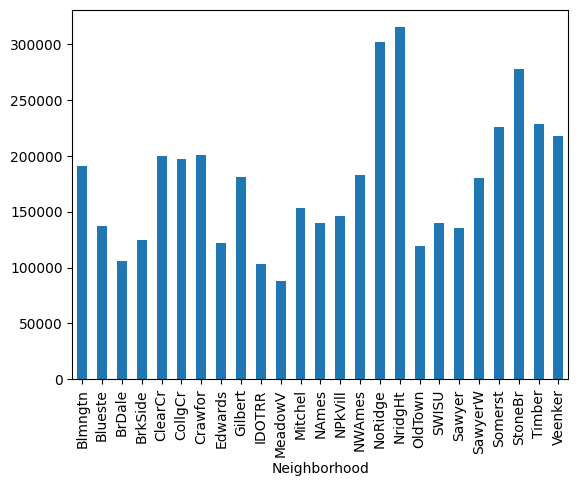

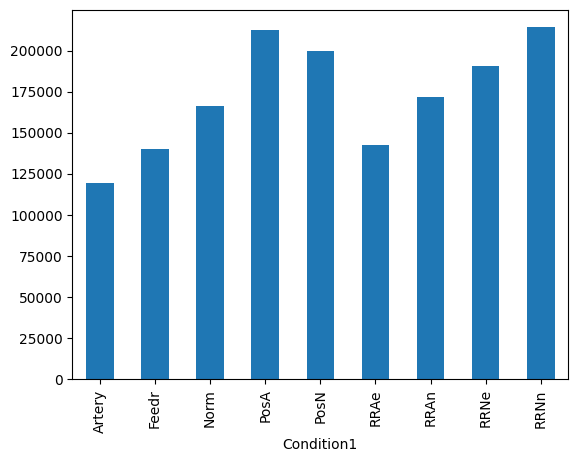

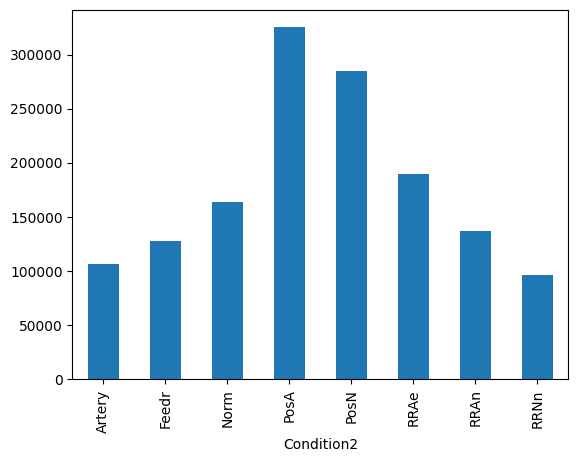

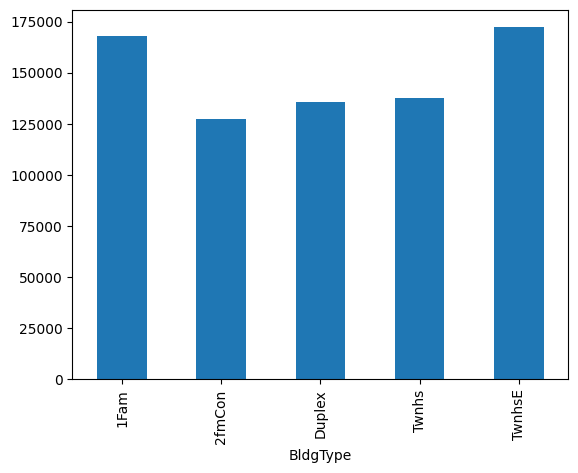

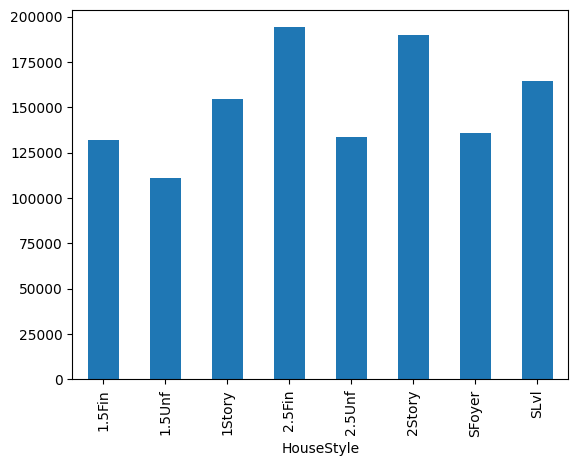

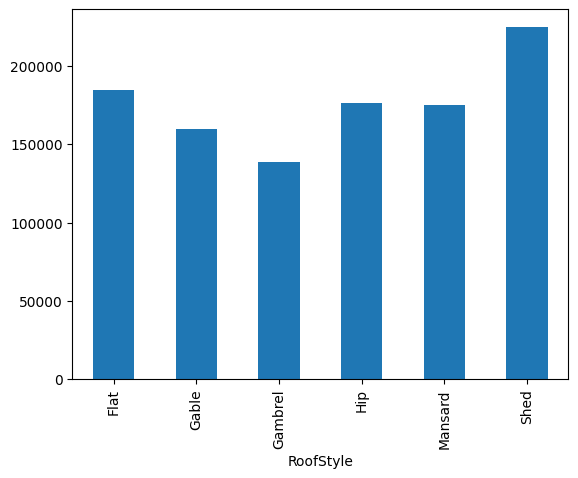

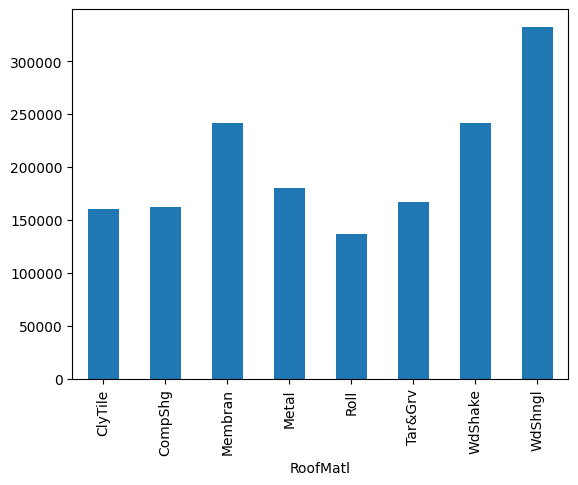

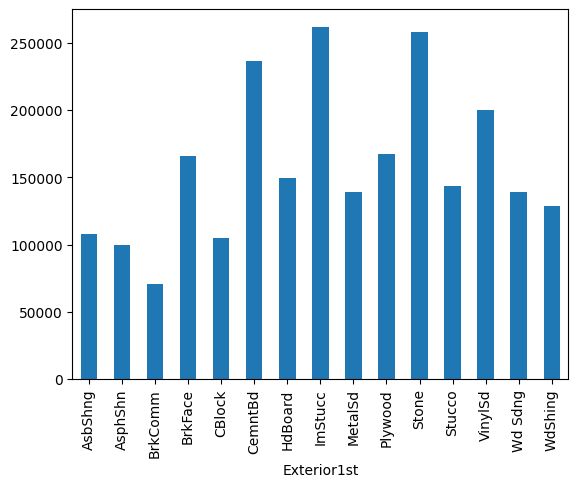

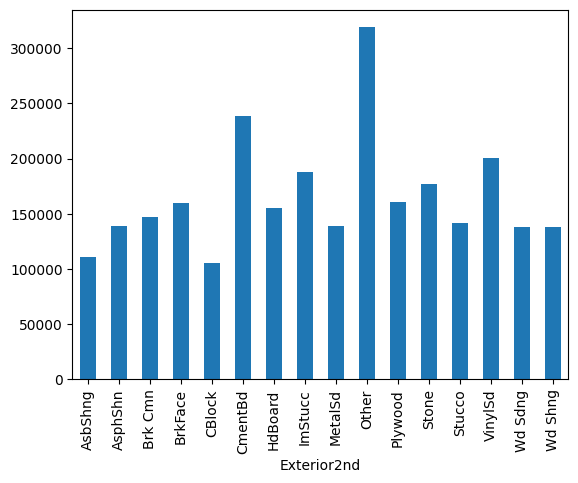

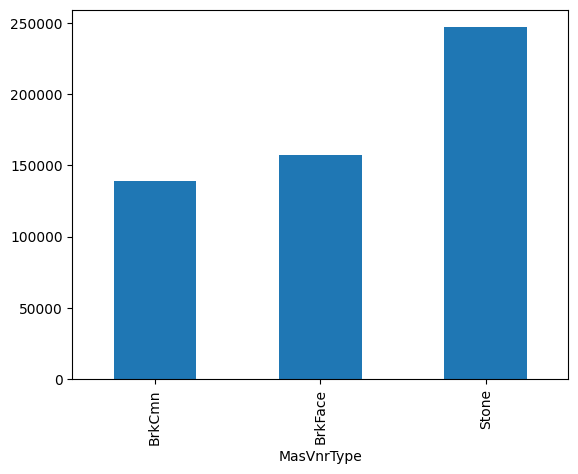

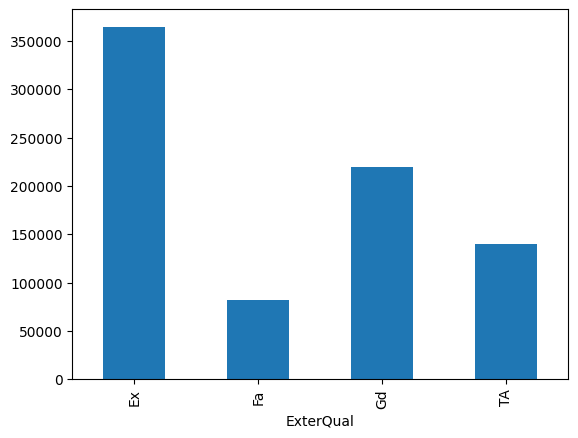

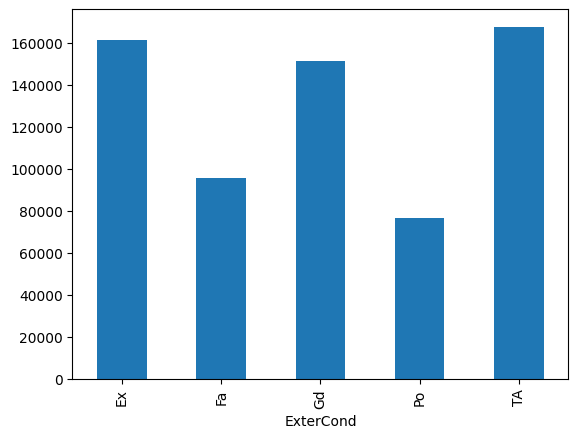

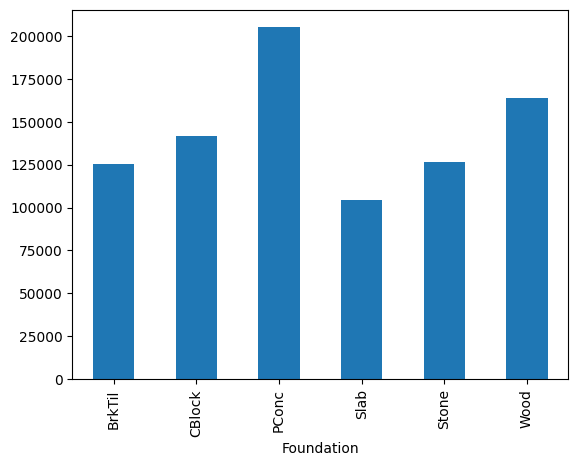

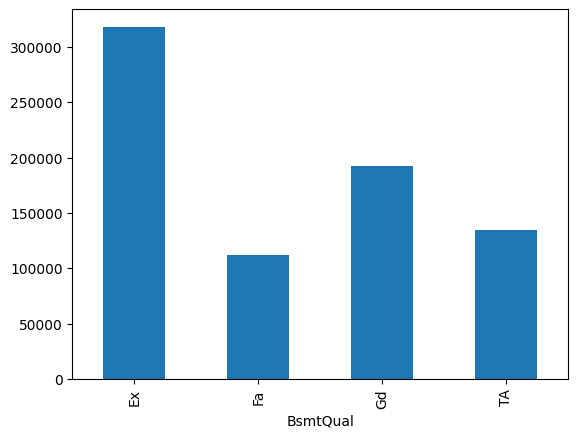

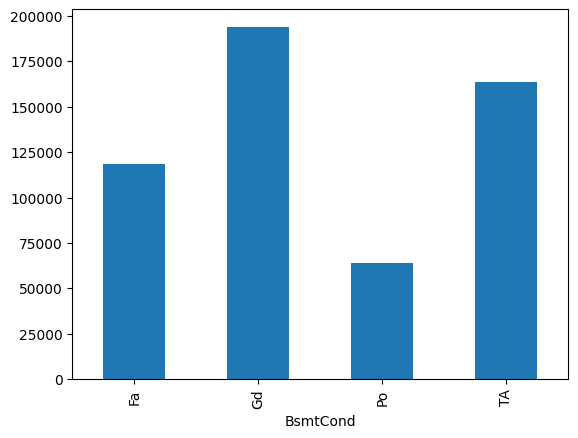

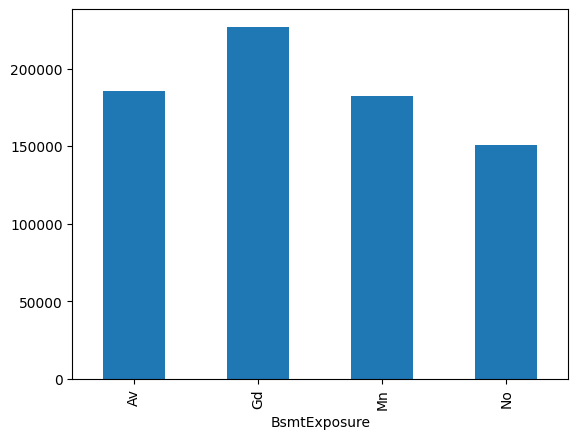

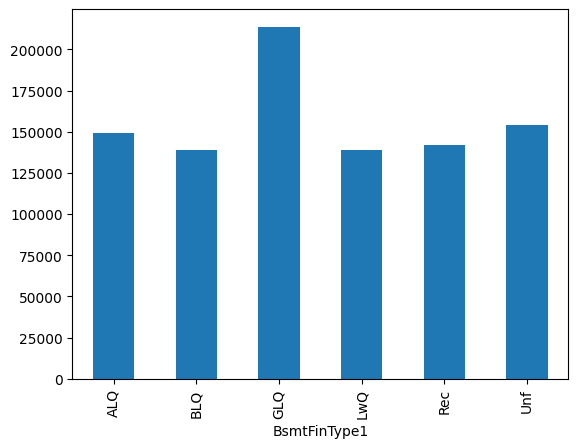

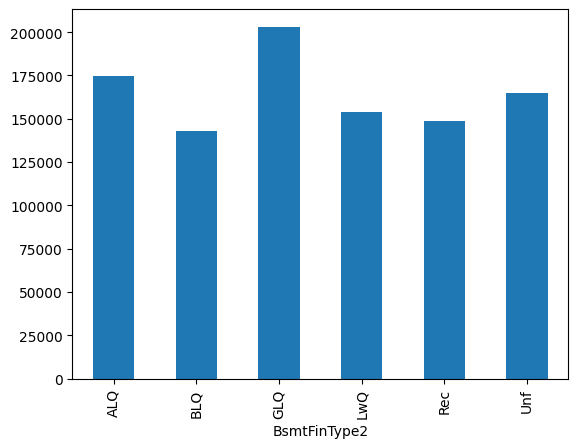

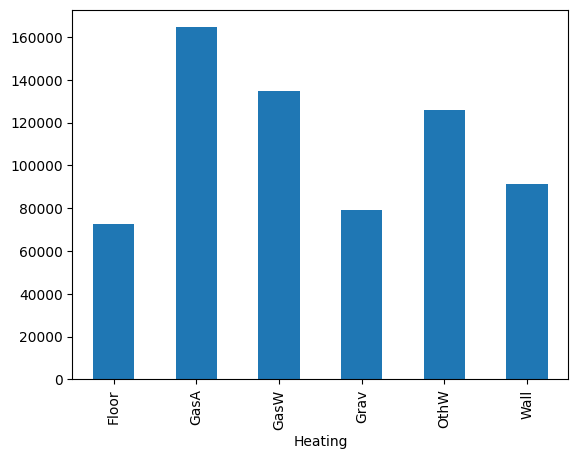

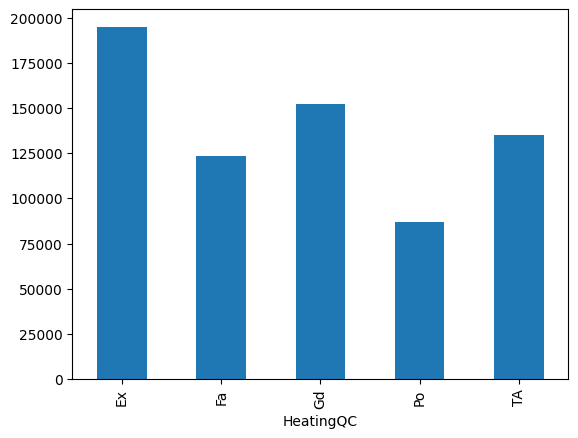

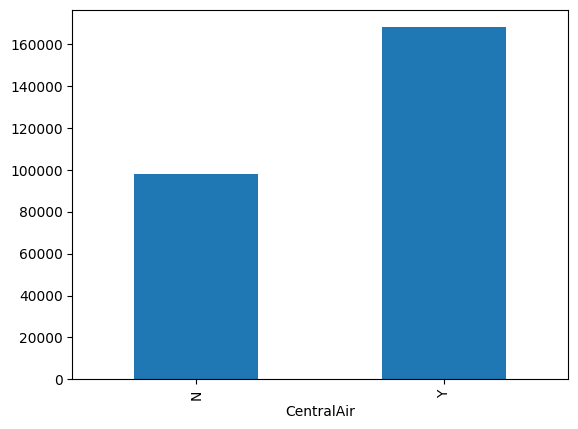

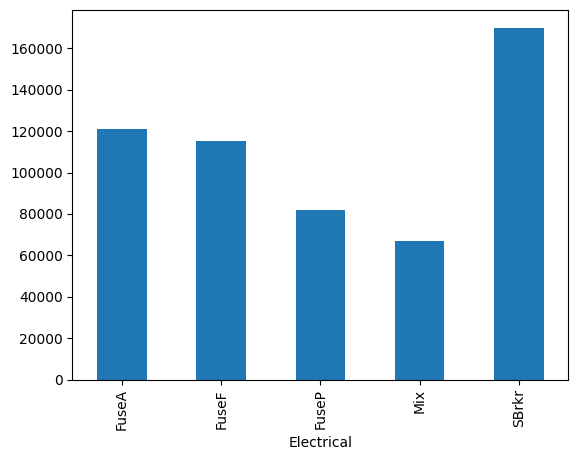

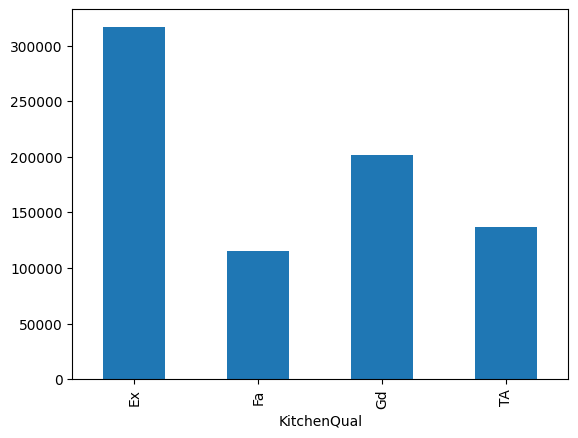

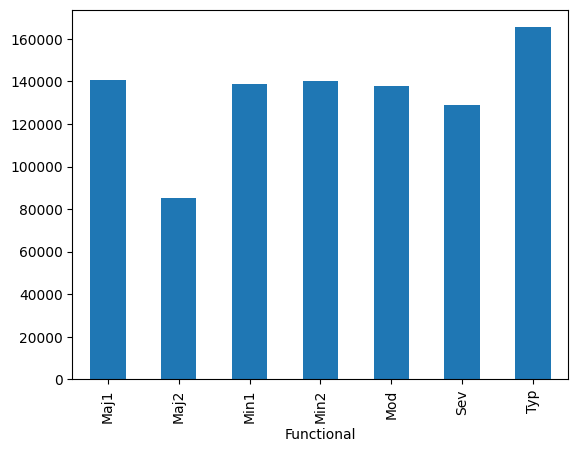

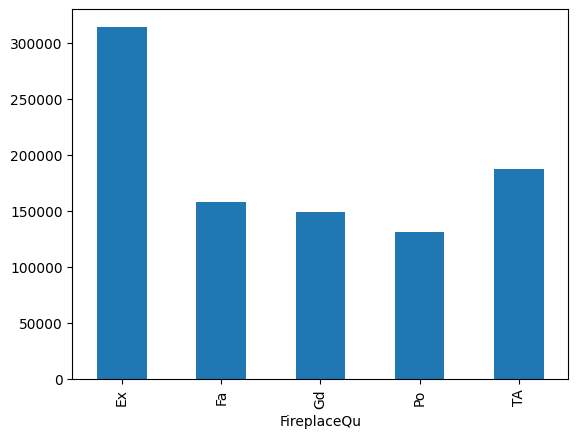

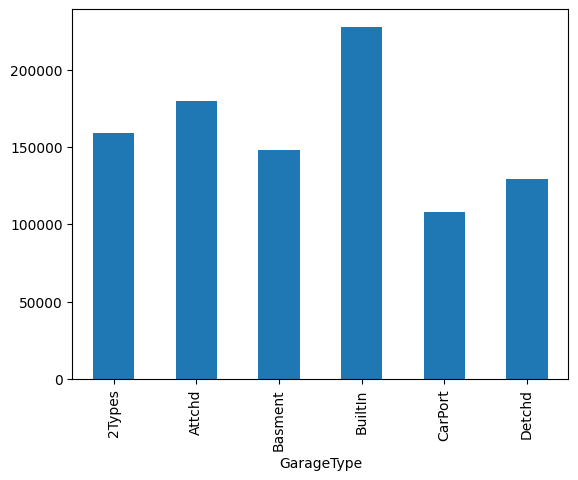

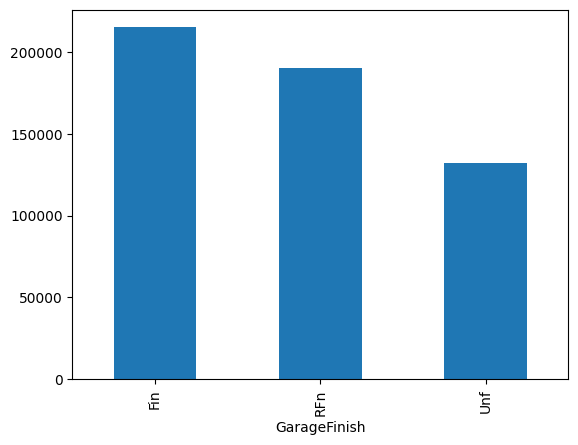

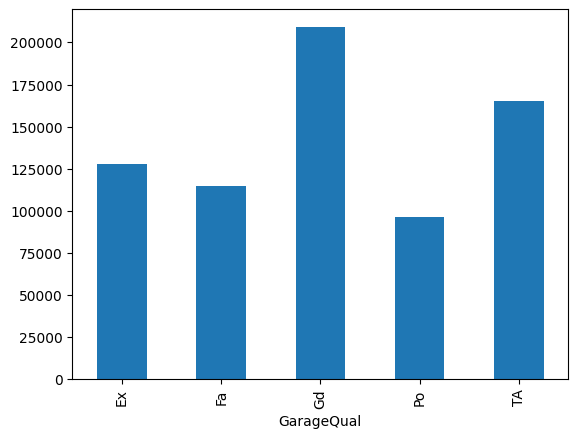

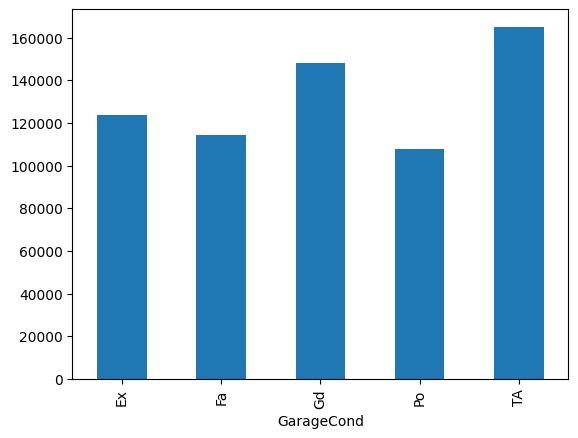

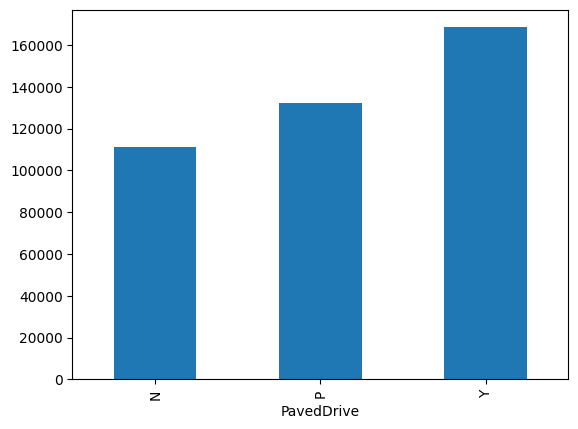

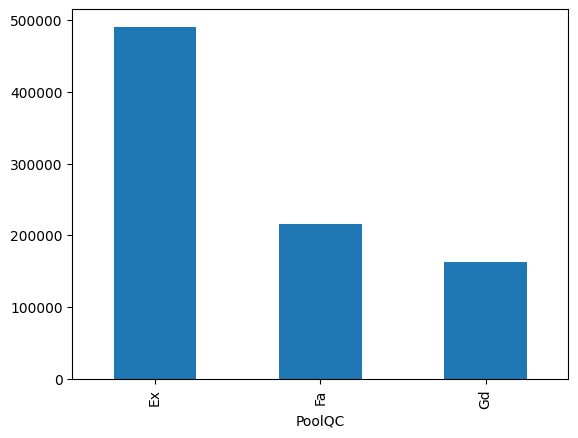

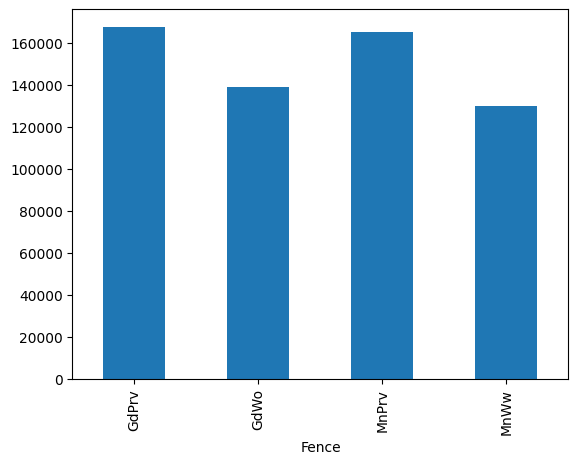

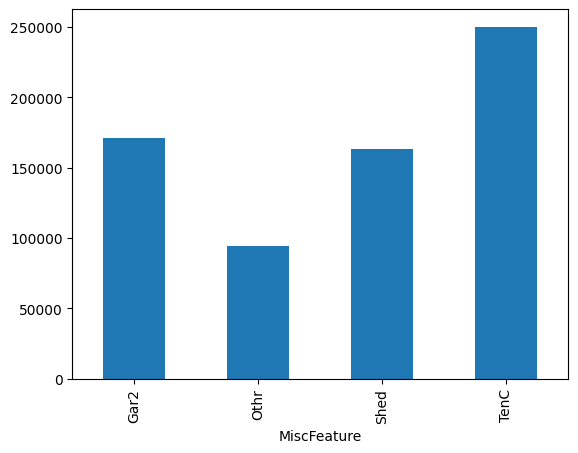

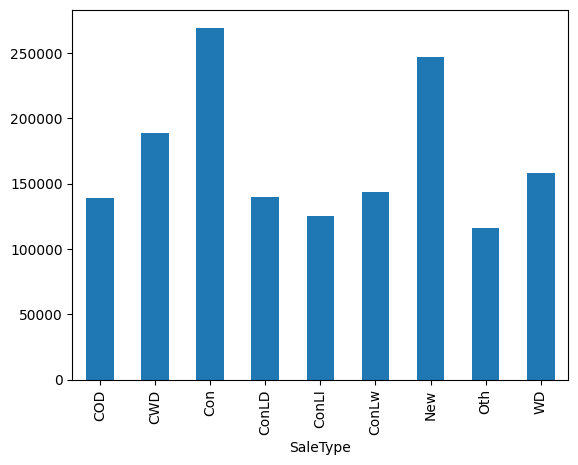

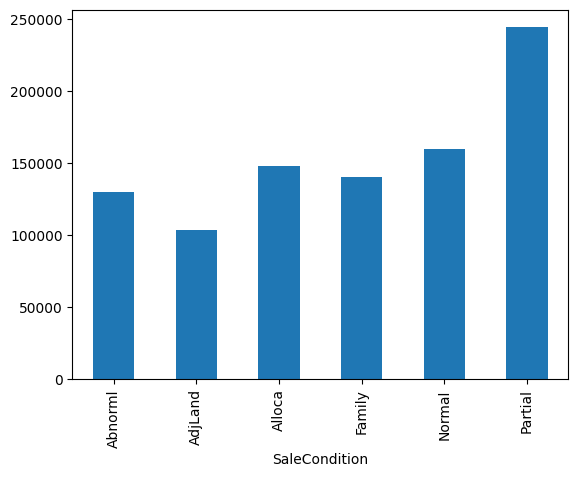

In [164]:
for k in cat:
    df.groupby([k])['SalePrice'].median().plot.bar()
    plt.show()

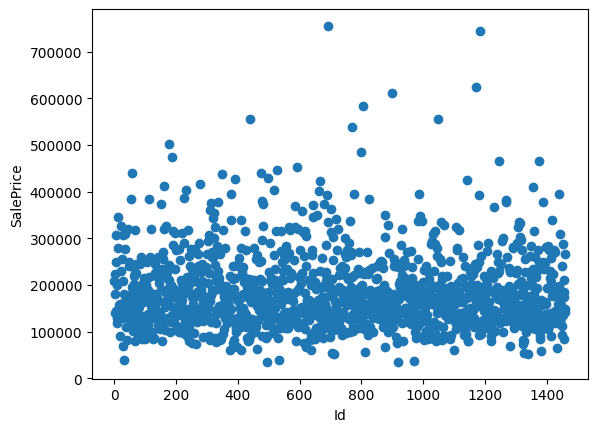

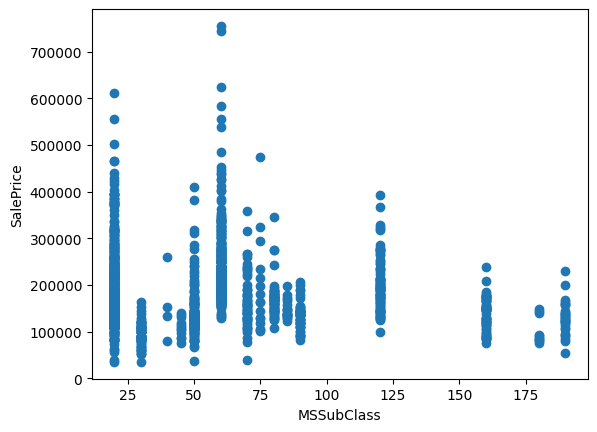

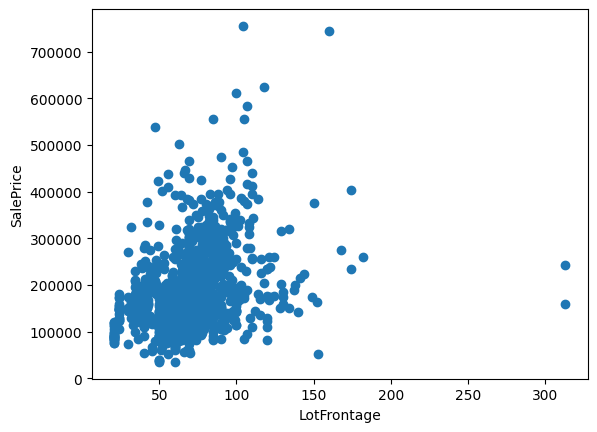

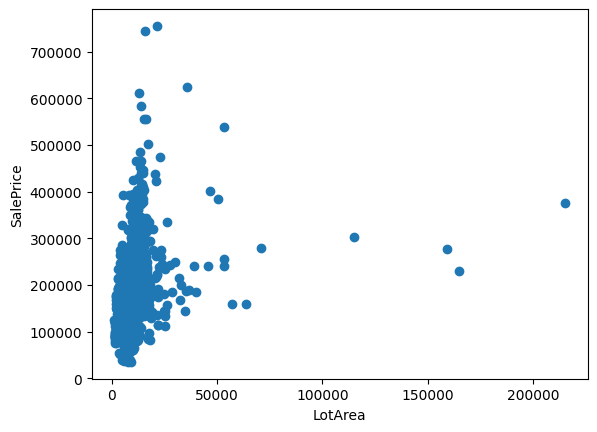

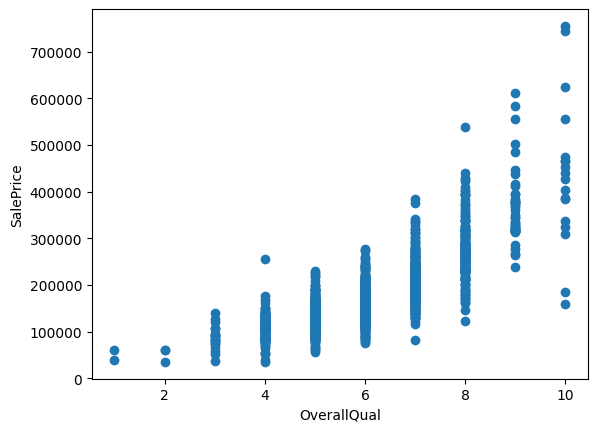

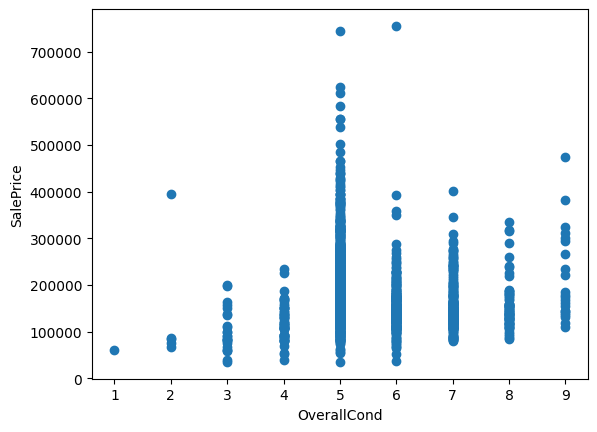

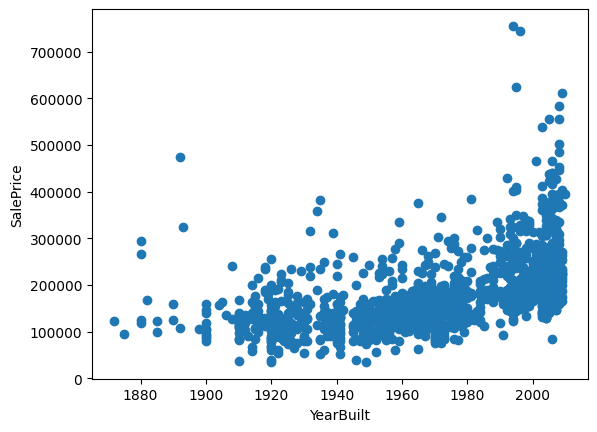

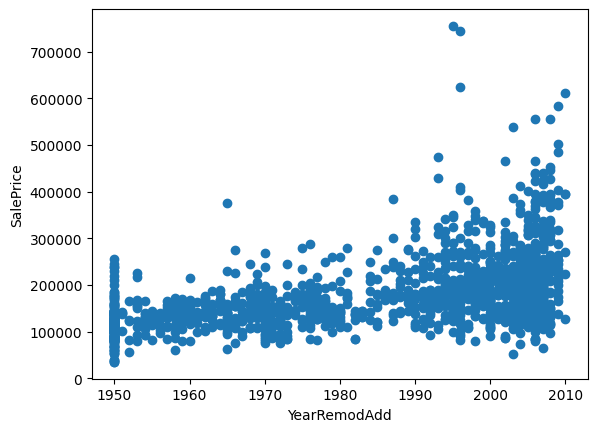

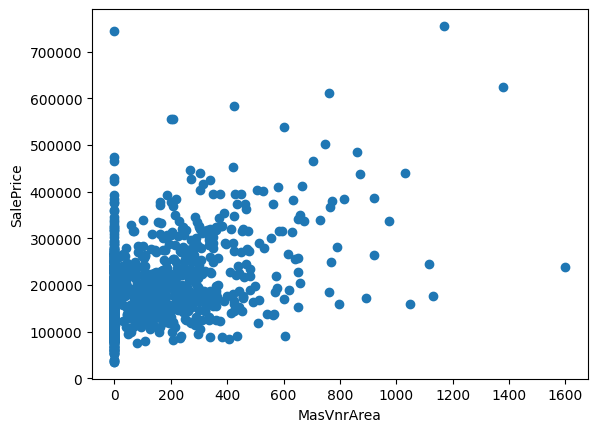

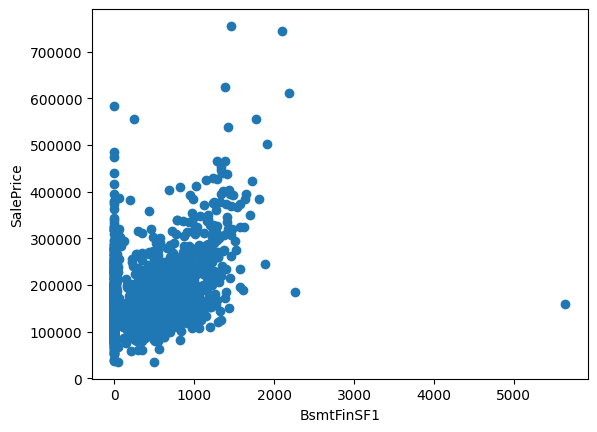

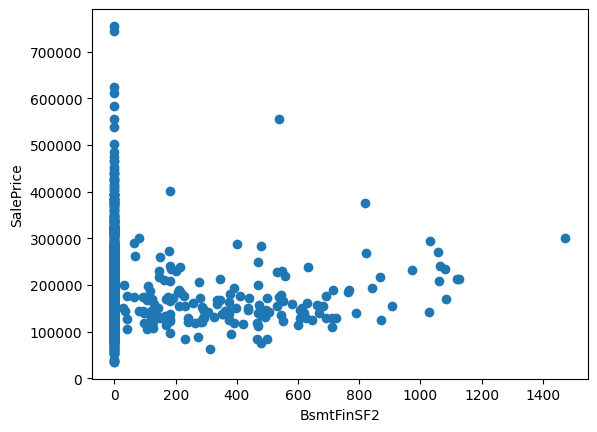

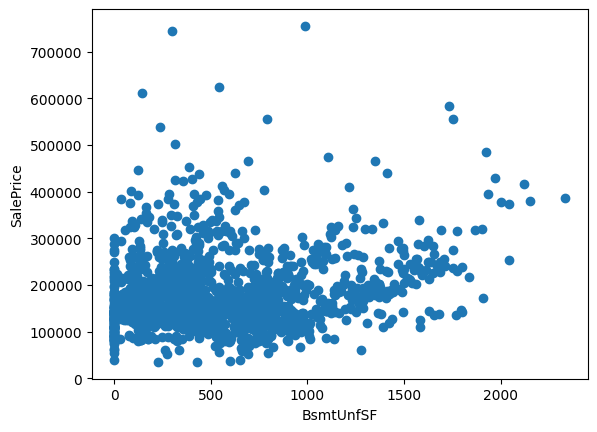

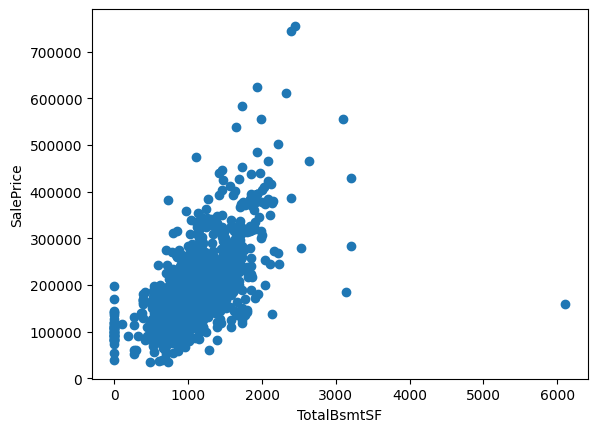

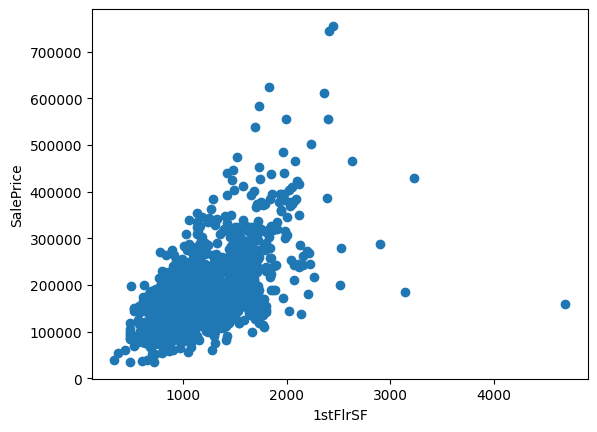

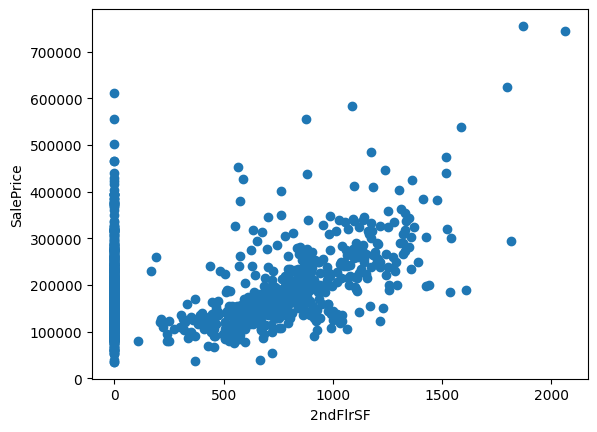

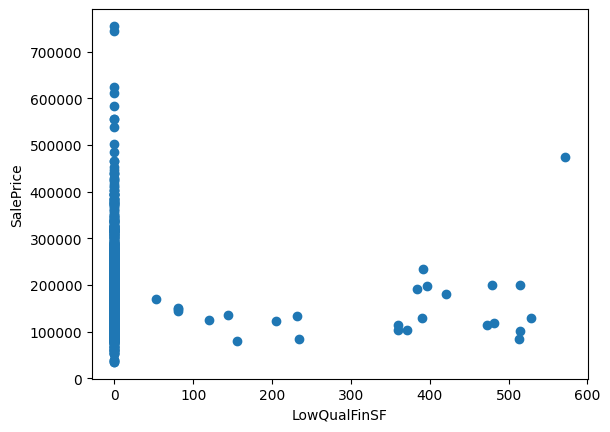

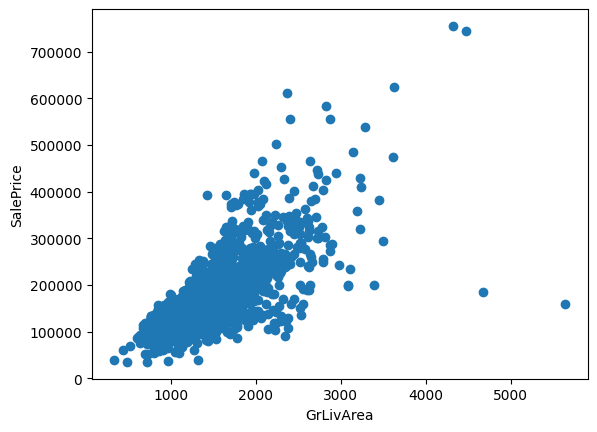

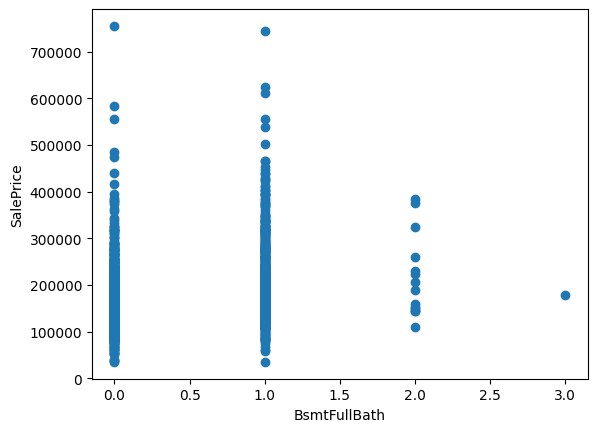

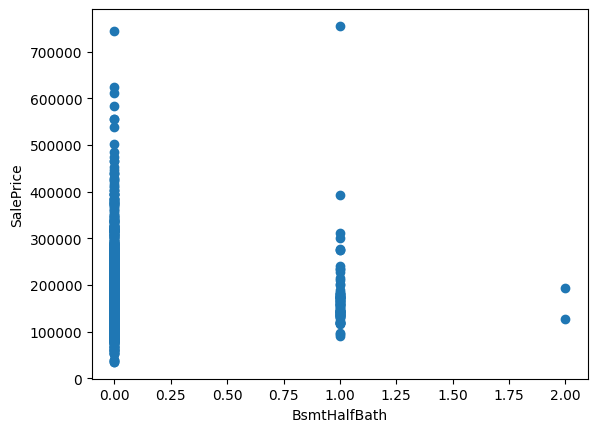

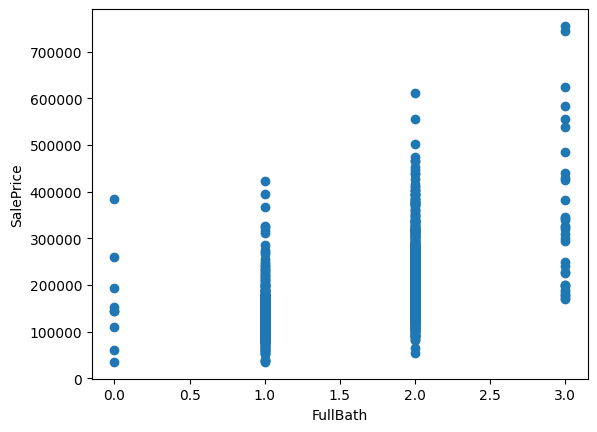

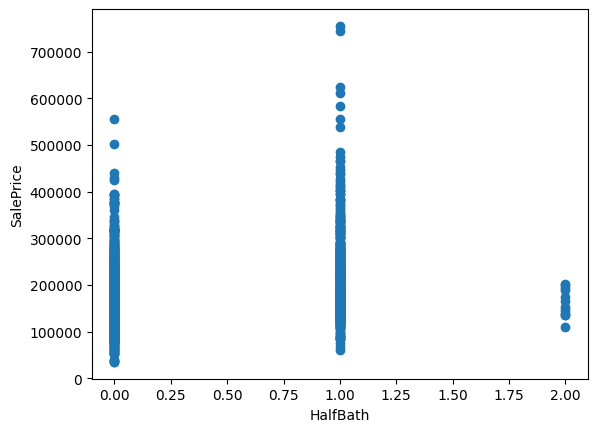

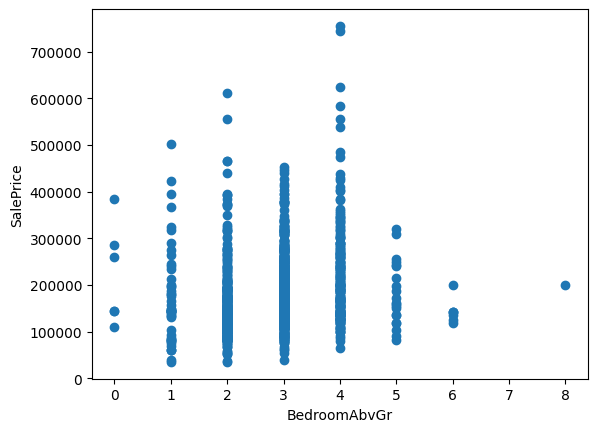

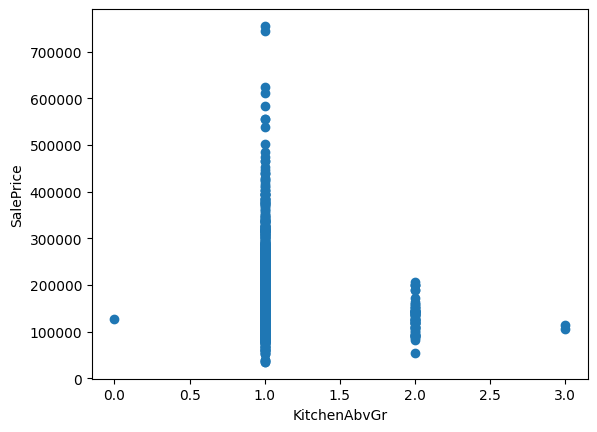

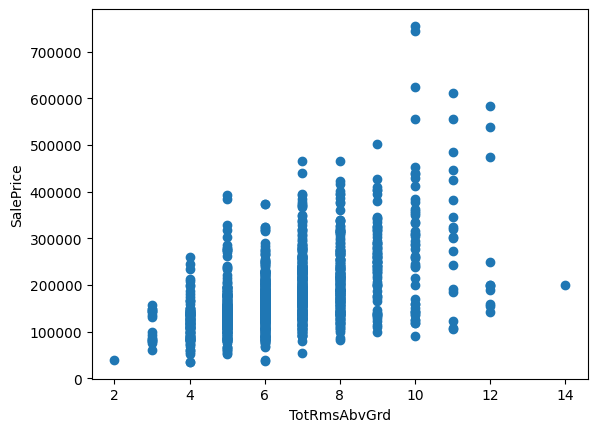

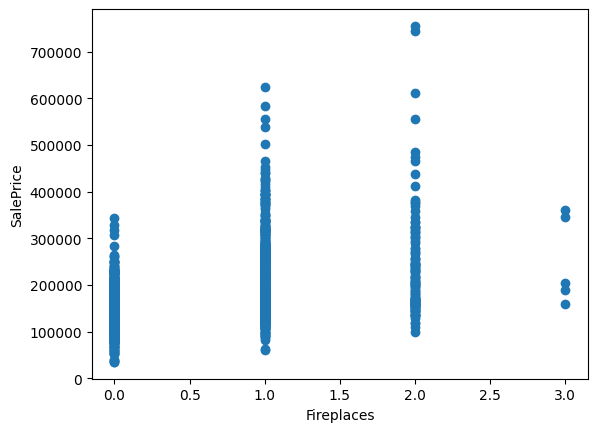

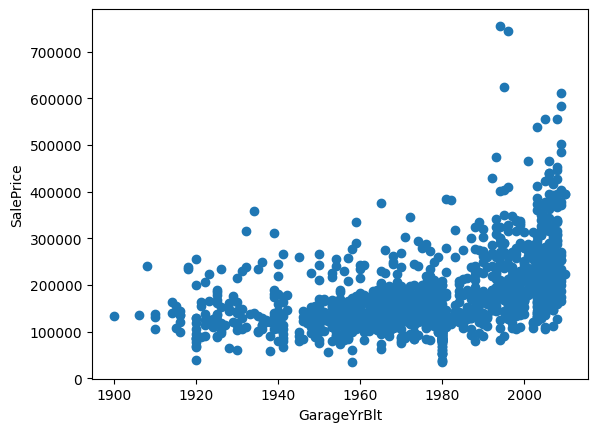

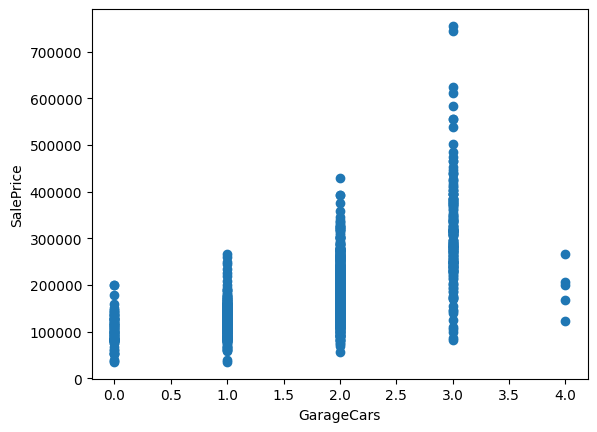

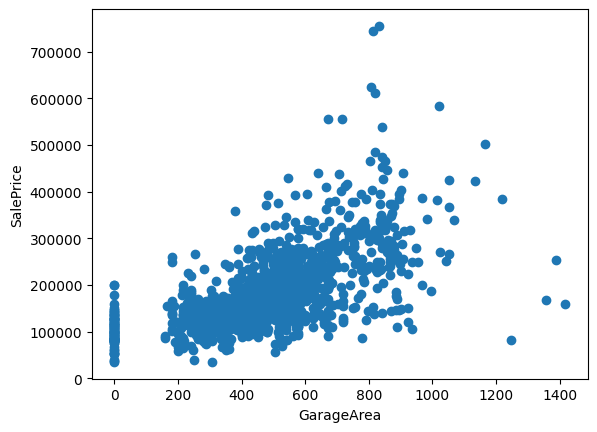

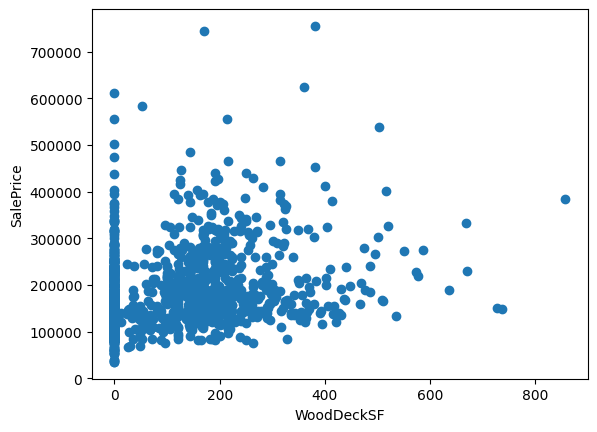

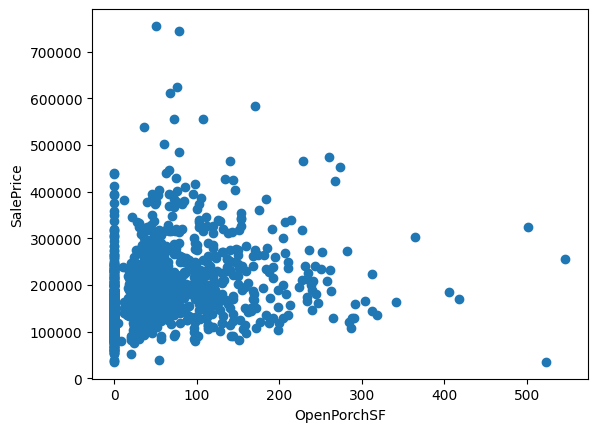

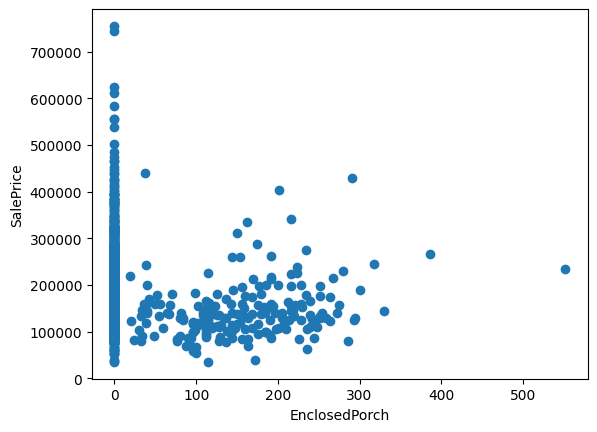

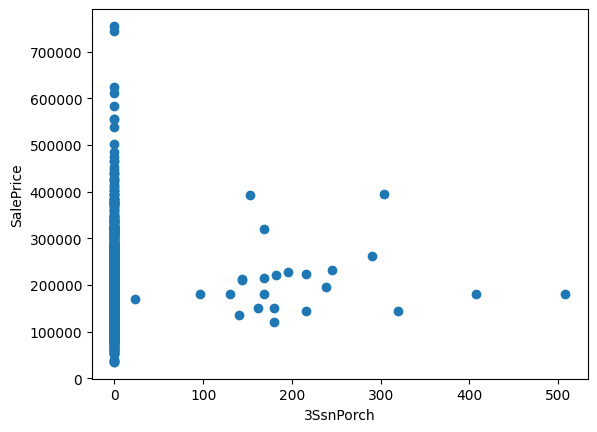

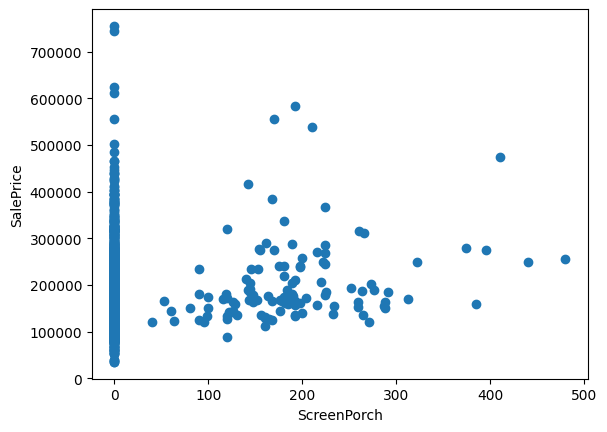

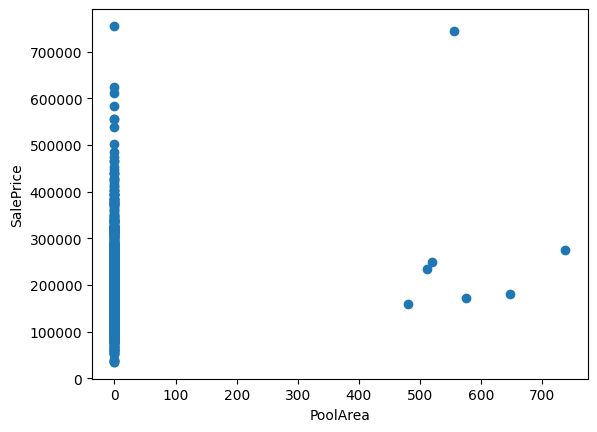

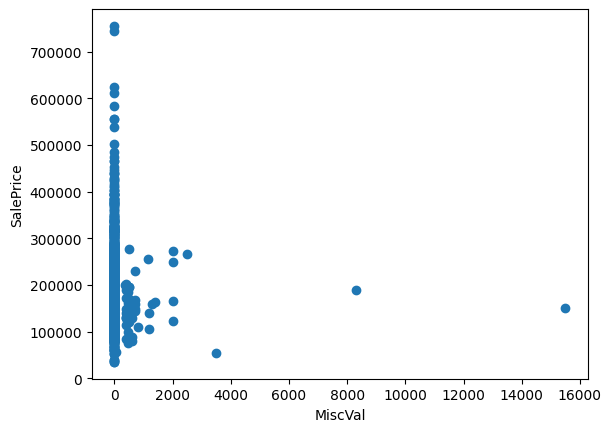

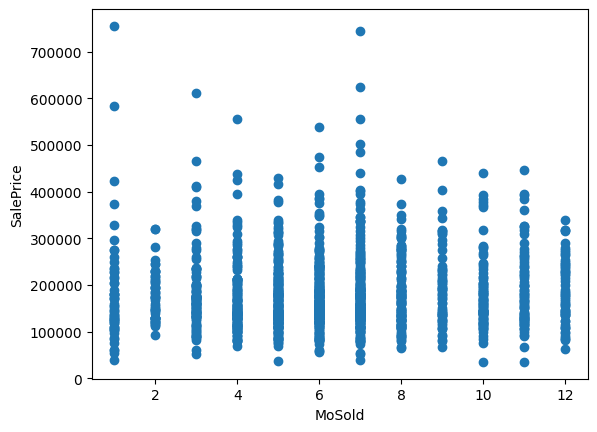

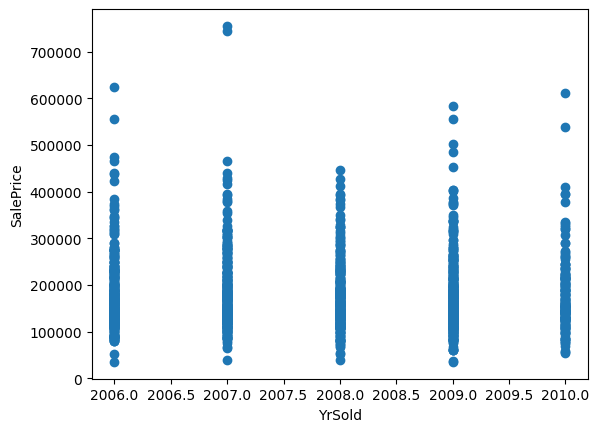

In [165]:
for k in cont:
    plt.scatter(df[k],df['SalePrice'])
    plt.xlabel(k)
    plt.ylabel('SalePrice')
    plt.show()

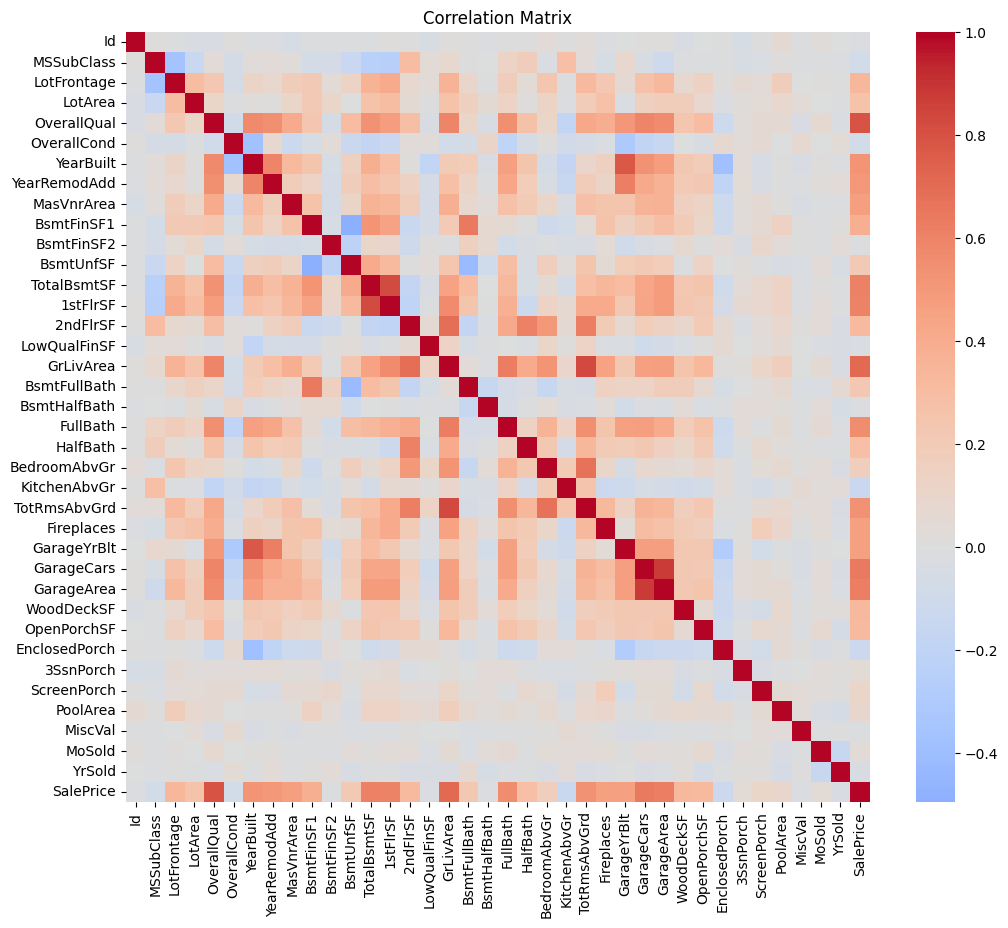

In [166]:
# Correlation-correlation matrix works only for numeric
# Correlation with target → tells us which features are predictive.
# Correlation between features → tells us which features are redundant.
# Together → helps in feature selection, reducing multicollinearity, and building better regression models.
corr = df[cont.tolist() + ['SalePrice']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
# cont → list of continuous (numeric) variables.
# cont.tolist() → converts that list/Index to a normal Python list.
# ['SalePrice'] → appends the target variable.
# df[cont.tolist() + ['SalePrice']] → selects only numeric features + SalePrice.
# .corr() → computes pairwise correlation matrix (Pearson correlation by default).
# Values range from -1 to +1.
# sns.heatmap() → plots the correlation matrix as a heatmap.
# corr → the matrix to visualize.
# cmap='coolwarm' → blue = negative, red = positive.
# center=0 → makes white color correspond to zero correlation (neutral).

In [167]:
# Red = Positive correlation (closer to +1 → strong positive relationship).
# Blue = Negative correlation (closer to -1 → strong negative relationship).
# White/light = Weak or no correlation (close to 0).
# The diagonal (dark red = 1.0) is each column with itself.
# The heatmap tells you which features matter most for SalePrice and which ones overlap/redundant.
# This guides feature selection before regression modeling
# Keep strong predictors → OverallQual, GrLivArea, GarageCars, TotalBsmtSF, YearBuilt.
# Drop irrelevant features → Id, MiscVal, 3SsnPorch, etc.
# Handle multicollinearity →
# Either keep only one of the correlated ones,
# Or use regularized models (Ridge/Lasso) that handle it automatically.

In [ ]:
#feature filtering
#(pairwise correlation between numeric features)
corr_with_target = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
#print(corr_with_target)
threshold = 0.3   # choose cutoff (e.g., |corr| > 0.3 means useful)
imp_features = corr[abs(corr) > threshold].index.tolist()
impo_features.remove('SalePrice')
#on correlation with target
important_features = corr_with_target[abs(corr_with_target) > threshold].index.tolist()
important_features.remove('SalePrice')



df_selected = df[important_features + ['SalePrice']]
df_selected
#am using correlation matrix to select features for regression model

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [169]:
#ML models need numbers, not text. So categorical features like "Neighborhood = CollgCr" or "ExterQual = Excellent"
#  must be converted into numeric form.--using one-hot encoding or label encoding.
#If you skip encoding, your model will completely ignore 40+ categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
cat_cols = df.select_dtypes(include='object').columns.tolist()
cont_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cont_cols.remove('SalePrice')  # target
# categorical features fall into two main groups:
# 1. Ordinal (ordered categories),2. Nominal (no order-One-hot encoding)
# Ordinal categorical columns (have a ranking)
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

# Define category order for each column
ordinal_categories = [
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtCond
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # FireplaceQu
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']   # GarageCond
]

nominal_cols = [col for col in cat_cols if col not in ordinal_cols]


In [ ]:
#Build preprocessing transformer
#ord → turns ordinal categories into numbers (like 1–5).
# onehot → turns nominal categories into dummy variables (0/1).
# num → standardizes numeric columns (mean=0, std=1).

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
#drop first category in OneHotEncoder (drop='first') → good to avoid multicollinearity.
preprocessor = ColumnTransformer(transformers=[
    ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), nominal_cols),
    ('num', StandardScaler(), cont_cols)
])


# What is ColumnTransformer?
# ColumnTransformer (from sklearn.compose) allows you to apply different preprocessing steps to different columns of your DataFrame in a single pipeline.
# This is useful when you have a mix of categorical and numeric features that need different types of preprocessing.
# 1. Ordinal Encoding for Ordered Categories
# Purpose: Converts ordinal categorical columns (those with a meaningful order, e.g., quality ratings) into numbers.
# How: Uses OrdinalEncoder with a specified order (qual_order), repeated for each ordinal column.
# Columns: ordinal_cols (e.g., ExterQual, KitchenQual, etc.)
# Result: Each category is replaced by an integer reflecting its order (e.g., 'Po'=0, 'Fa'=1, ..., 'Ex'=4).
# 2. One-Hot Encoding for Nominal Categories
# Purpose: Converts nominal categorical columns (no meaningful order, e.g., neighborhood names) into binary columns (dummy variables).
# How: Uses OneHotEncoder with handle_unknown='ignore' (so unseen categories at test time won't cause errors) and drop='first' (to avoid multicollinearity by dropping the first category).
# Columns: All categorical columns in cat_cols except those in ordinal_cols.
# Result: Each category becomes a new column with 0/1 values.
# 3. Scaling Numeric Features
# Purpose: Standardizes numeric features so they have mean 0 and standard deviation 1.
# How: Uses StandardScaler.
# Columns: cont (your continuous numeric features).
# Result: Numeric features are scaled, which helps many machine learning models perform better.
# Why use this?
# Efficiency: All preprocessing is done in one step, making your workflow cleaner and less error-prone.
# Consistency: Ensures the same transformations are applied to both training and test data.
# Integration: Can be used directly in a Pipeline with your machine learning model.


In [171]:
#Create pipeline with regression model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),   # first do preprocessing
    ('regressor', LinearRegression()) # then run regression
])


In [172]:
#regression pipeline-Pipeline allows you to chain preprocessing + model in one step
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [173]:
#Train/Test split
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [174]:
#Fit pipeline and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# The pipeline automatically:
# Encodes ordinal columns
# One-hot encodes nominal columns
# Scales numeric columns
# Fits Linear Regression

c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [175]:
#Evaluate model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, R²: {r2:.3f}")
# RMSE → measures average prediction error in original units (SalePrice).
# R² → how well the model explains variance in the target.
# Both metrics give a quantitative measure of model performance.

# R² ≈ 0.673-Your model explains 67% of the variance in house prices.

RMSE: 50052.38, R²: 0.673


In [176]:
#To reduce RMSE and increase R²
# Reuse your preprocessor.
# Train Linear, Ridge, Lasso, RandomForest, GradientBoosting (XGBoost optional if installed).
# Evaluate each with RMSE & R².
# Collect results in a table for easy comparison.

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary of models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = []

for name, regressor in models.items():
    # Create pipeline (same preprocessor + different regressor)
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    
    # Fit on training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, rmse, r2])

# Put results in a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R²"])
print(results_df)

# What This Means
# Linear Regression (baseline)
# High RMSE, low R² (67%).
# Struggles because it assumes linear relationships and is sensitive to multicollinearity.

# Ridge Regression
# Huge improvement over Linear Regression.
# RMSE dropped by ~19K, R² jumped to ~87%.

# Regularization (L2 penalty) handles multicollinearity and stabilizes coefficients.
# Lasso Regression
# Performed nearly the same as Linear Regression.
# Suggests feature selection via L1 penalty didn’t help here (likely many features are important).

# Random Forest
# RMSE ~28K, R² ~89%.
# Captures nonlinear relationships and interactions.
# More robust than linear models.

# Gradient Boosting
# Best model so far: RMSE ~26K, R² ~91%.
# Boosting focuses on difficult-to-predict samples, giving it an edge over Random Forest.

c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 24] during transform. These unknown categories will b

               Model          RMSE        R²
0  Linear Regression  50052.378698  0.673385
1   Ridge Regression  31263.829201  0.872570
2   Lasso Regression  50050.846008  0.673405
3      Random Forest  28678.968653  0.892771
4  Gradient Boosting  26462.591264  0.908704


c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
#Hyperparameter Tuning (GridSearchCV)-This will return best hyperparameters and cross-validated RMSE.
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge_params = {'regressor__alpha': [0.1, 1, 10, 50, 100]}
ridge_search = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())]),
    param_grid=ridge_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
ridge_search.fit(X_train, y_train)
print("Best Ridge params:", ridge_search.best_params_, "RMSE:", -ridge_search.best_score_)

# Random Forest
rf_params = {'regressor__n_estimators': [100, 200],
             'regressor__max_depth': [None, 10, 20],
             'regressor__min_samples_split': [2, 5]}
rf_search = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))]),
    param_grid=rf_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
rf_search.fit(X_train, y_train)
print("Best RF params:", rf_search.best_params_, "RMSE:", -rf_search.best_score_)

# Gradient Boosting
gb_params = {'regressor__n_estimators': [100, 200],
             'regressor__learning_rate': [0.05, 0.1],
             'regressor__max_depth': [3, 5]}
gb_search = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(random_state=42))]),
    param_grid=gb_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
gb_search.fit(X_train, y_train)
print("Best GB params:", gb_search.best_params_, "RMSE:", -gb_search.best_score_)
#For RandomForest/GB, can  tune min_samples_leaf and max_features → often improves RMSE.

Best Ridge params: {'regressor__alpha': 50} RMSE: 33756.344366076126
Best RF params: {'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200} RMSE: 30306.358099346126
Best GB params: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 200} RMSE: 28181.37726364404


In [178]:
#Advanced Models (XGBoost, LightGBM, CatBoost)-often outperform scikit-learn’s GradientBoosting
#pip install xgboost lightgbm catboost-cmd prompt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

advanced_models = {
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=-1, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=500, learning_rate=0.05, depth=6, verbose=0, random_state=42)
}

results_adv = []

for name, regressor in advanced_models.items():
    model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', regressor)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results_adv.append([name, rmse, r2])

pd.DataFrame(results_adv, columns=["Model", "RMSE", "R²"])


c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3410
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 141
[LightGBM] [Info] Start training from score 181441.541952


c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\rajas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [14, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Model,RMSE,R²
0,XGBoost,25165.481120,0.917435
1,LightGBM,29314.742269,0.887964
2,CatBoost,27142.801650,0.903950


In [179]:
# #chatgpt suggested:
# # Cross-Validation for Robust Evaluation-This gives a more reliable performance estimate.

# from sklearn.model_selection import cross_val_score

# # Example: Random Forest with 5-fold CV
# rf_model = Pipeline([('preprocessor', preprocessor),
#                      ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))])

# cv_scores = cross_val_score(rf_model, X, y,
#                             cv=5,
#                             scoring='neg_root_mean_squared_error',
#                             n_jobs=-1)

# print("Cross-validated RMSE:", -cv_scores.mean())


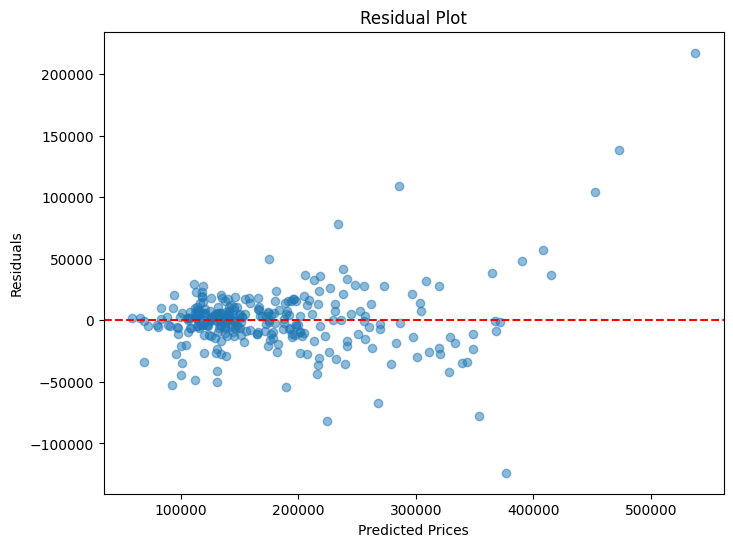

      Actual      Predicted    Residual
746   236000  235994.985761    5.014239
353   105900  105914.405828  -14.405828
233   128200  128217.105619  -17.105619
1053  144500  144426.503190   73.496810
274   124500  124669.426768 -169.426768
1228  367294  367469.782338 -175.782338
584   133000  133188.947612 -188.947612
781   175900  175512.519203  387.480797
44    141000  140590.265585  409.734415
1102  135000  135438.041124 -438.041124


In [180]:
#Error Analysis
# If residuals are random (good) or show patterns (bad, missing feature).
# Which houses are hardest to predict → maybe they have rare features or outliers.

import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Worst predictions
errors = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Residual": residuals})
print(errors.sort_values(by="Residual", key=abs).head(10))  # 10 biggest mistakes


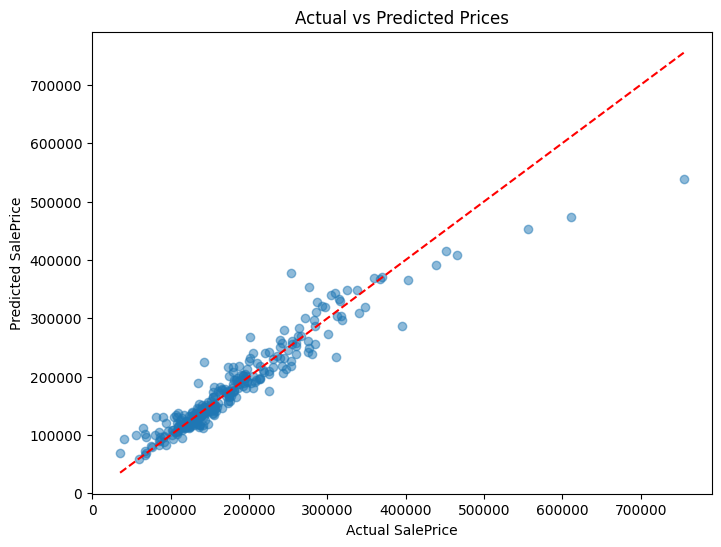

In [181]:
# The largest error shown is ~438, which is only 0.3% of the house value.
# This suggests our model is doing really well on most predictions.

# Actual vs Predicted scatterplot
# Good way to see if model under/overestimates at certain price ranges

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')  # perfect fit line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Prices")
plt.show()

# If points hug the red line → good predictions.
# If curve/funnel appears → bias in certain ranges (e.g., expensive houses underpredicted).

In [182]:
# Interpretation of the Plot

# Overall Fit

# Most points are close to the red diagonal line (perfect predictions).
# Confirms your model is doing well overall.

# High-priced houses (right side of the graph)
# Many blue dots fall below the red line.
# This means the model underpredicts expensive houses (predicts them cheaper than they really are).

# Outliers
# Residuals get larger as price increases → called heteroscedasticity.
# Common in real estate: predicting cheap houses is easier, predicting luxury houses is harder


# Summary for Report

# Problem: Predict house prices (continuous target) from mixed features.
# Evaluation Metric: RMSE (primary), R² (secondary)
# EDA Insights: Strong predictors, missing data treatment, feature correlation.
# Models: Baseline → regularized → tree-based → boosting → ensemble.
# Key Findings: Gradient Boosting / CatBoost gave best results (~RMSE 26k, R² 0.91).
# Error Analysis: Model struggles with luxury houses (high SalePrice), some heteroscedasticity.

In [ ]:
# Evaluation using chatgpt suggested:
# Perfect! You’ve essentially done a full end-to-end regression project on the House Prices dataset. Here’s a structured breakdown of what you have done and some suggestions for polishing and next steps:

# 1. Data Loading & Initial Checks
# ✅ Loaded CSV and inspected head() and shape.
# ✅ Checked for missing values

# Perfect! You’ve essentially done a full end-to-end regression project on the House Prices dataset. Here's a structured breakdown of what you have done and some suggestions to polish it for submission:

# 1. Data Loading & Initial Checks
# ✅ Loaded CSV and inspected head() and shape.
# ✅ Checked missing values with isnull() / isna() and handled them:
# Numeric → median
# Categorical → mode
# 💡 Tip: You can also visualize missing values with sns.heatmap(df.isnull()) for clarity.

# 2. Exploratory Data Analysis (EDA)
# ✅ Split columns into categorical (cat) and numeric (cont) features.
# ✅ Visualized:
# Categorical vs SalePrice → median bar plots.
# Numeric vs SalePrice → scatter plots.
# ✅ Correlation analysis:
# Heatmap of numeric features.
# Correlation with target to filter important features (|corr| > 0.3).
# 💡 Tip: Highlight strong predictors (OverallQual, GrLivArea) in your report.

# 3. Feature Engineering & Preprocessing
# ✅ Split categorical features into:
# Ordinal → OrdinalEncoder (with proper order)
# Nominal → OneHotEncoder (drop first to avoid multicollinearity)
# ✅ Scaled numeric features with StandardScaler.
# ✅ Built ColumnTransformer for preprocessing.
# 💡 Tip: Keep a list of selected features and describe why you included/excluded features in the report.

# 4. Model Building
# ✅ Pipeline approach (preprocessor + model) → keeps preprocessing consistent.
# ✅ Models trained:
# Linear Regression
# Ridge / Lasso
# Random Forest
# Gradient Boosting
# Advanced models: XGBoost, LightGBM, CatBoost
# ✅ Evaluation metrics:

# RMSE

# R²

# ✅ Cross-validation suggested for robust evaluation.
# 💡 Tip: Create a comparison table:

# Model	RMSE	R²
# Linear Regression	67,000	0.673
# Ridge	49,000	0.87
# Random Forest	28,000	0.89
# Gradient Boosting	26,000	0.91

# 5. Hyperparameter Tuning
# ✅ Used GridSearchCV for Ridge, Random Forest, Gradient Boosting.
# ✅ Identified best hyperparameters and cross-validated RMSE.
# ✅ Optional: Repeat for XGBoost / LightGBM / CatBoost for potentially better performance.

# 6. Error Analysis
# ✅ Residual plots to check randomness.
# ✅ Worst predictions sorted by absolute residuals.
# ✅ Actual vs predicted plot:

# Model underpredicts expensive houses → common issue in housing datasets.
# Residuals increase with price → heteroscedasticity.
# 💡 Tip: Consider log-transforming SalePrice to reduce heteroscedasticity for further improvement.

# 7. Next Steps / Optional Improvements
# Feature Engineering
# Interaction terms (GrLivArea * OverallQual).
# Polynomial features for numeric variables.
# Aggregated features (e.g., total bathrooms, total porch area).
# Regularized models
# Use ElasticNet to combine Ridge + Lasso benefits.
# Advanced ensemble
# Stacking / blending multiple models for better RMSE.
# Deploy Web App
# Use Streamlit with top 5–10 most important features.
# Allow user input → show predicted house price.


# Summary of Corrections/Improvements
# Section	Suggestion / Fix
# Feature selection	Use corr_with_target instead of corr for thresholding
# Target variable	Consider log1p(SalePrice) to reduce effect of outliers
# Categorical encoding	Ensure 'NA' categories in ordinal features are handled correctly
# Scaling	Tree-based models don’t require scaling
# Hyperparameter tuning	Tune additional params: min_samples_leaf, max_features, add early_stopping
# Pipelines	Remove duplicate pipeline definitions
# Plots	Limit categorical plots to top features for speed
# Cross-validation	Add cross_val_score for robust evaluation

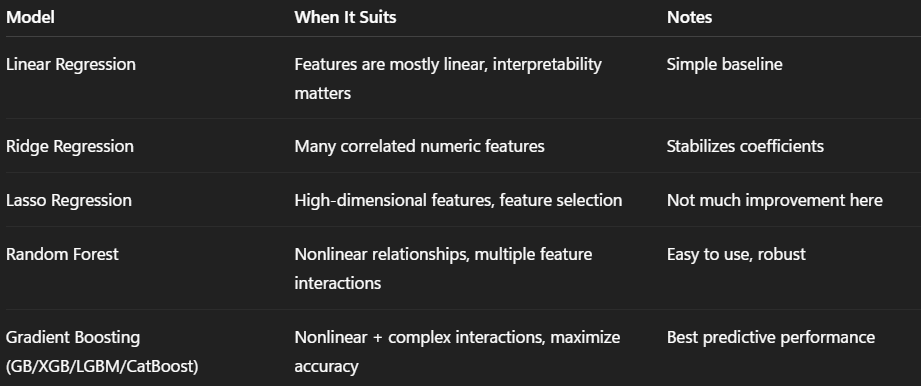